In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Baseline Python
This notebook is intended to make a quick scan of different skills. It will test:

- knowledge about mathematical notation (function definitions, sets) and a minimum of linear algebra (matrix multiplication)
- numpy (generating data, concatenating, dotproduct)
- generate a pandas dataframe, basic plotting
- creating a class
- basic efficiency (avoiding forloops with vectorization)
- list comprehensions

Don't worry if you get stuck: this notebook is meant to identify the subjects where you will need more explanation.

## Excercise 1
Let there be $m$ observations $x_i \in X$ with $i=\{1, ..., m\}$ where every observation has $n$ features: $x_i=\{x_{i,j}, ..., x_{i,n}\}$ with $j=\{1, ..., n\}$.
We will represent these as a matrix $X$ with dimensions $(m, n)$ such that value $x_{i,j}$ is the $i^{th}$ observation for feature $j$.

Use numpy to create a matrix $X$ with $m=100, n=2$, filled with random floating point numbers. This will be our set of 100 observations with 2 features.

In [93]:
X = np.random.rand(100,2)

## Excercise 2

Now, implement a function $f: \mathbb{R}^m \to \mathbb{R}$ such that $f(x) = wx + b$.
Here, $w$ are weights $w={w_j, ..., w_n}$ where $n$ corresponds to the features and $b$ is an extra bias weight. We will initialize $w$ at random.

E.g. if we observe a person $x_1$, as features let us measure someones length and shoe-size. Let us obtain $x_1=\{1.84, 46\}$.
Now, let our randomly initialized weights $w$ be $[0.9, 0.2]$ and our $b=3$. With this, we would need to calculate: $0.9 * 1.84 + 0.2 * 46 + 3$ for that person.
For a next person let us obtain $x_2=\{1.65, 36\}$, and thus we would need to calculate $0.9 * 1.65 + 0.2 * 36 + 3$.

To implement this more efficient, we will redefine the function slightly:
First, we add a dummy observation of 1 to the features: we get $x_i=\{x_{i,j}, ..., x_{i,n}, 1\}$
Then, we add the bias to the weights, such that we get $w=\{w_j, ..., w_n, b\}$.
With this, we can change the formula to $$f(x)= wx$$
E.g. our previous example would be $x_1=\{1.84, 46, 1\}$ and $w=\{0.9, 0.2, 3\}$ and we would calculate $0.9 * 1.84 + 0.2 * 46 + 3 * 1$.

To implement this , do the following:
- create a columnvector $Xb$ where all entries are equal to 1, with dimensions $(m, 1)$. This will be the weight used for the bias. Do not hardcode $m$, but retrieve it from $X$.
- concatenate the observations $X$ with $Xb$ along the columns, such that you get a matrix with dimensions $(m, n+1)$.
- initialize a columnvector $w$ where you add the bias as one of the weights. So, it should have dimensions $(n+1, 1)$. Do not hardcode $n$, but retrieve it from $X$.
- calculate $f(x)$ for all $m$


store the result of your calculation, that should have shape $(m, 1)$ in a variable `yhat`, which refers to your prediction $\hat{y}$ 

In [94]:
Xb = np.ones((len(X), 1))
X = np.concatenate([X, Xb], axis=1)
W = np.random.rand(X.shape[-1],1)
yhat = np.dot(X, W)

## Excercise 3

- concatenate $X$ and your prediction `yhat`
- put them in a pandas dataframe, with column names 'lenght', 'shoe', 'bias' and 'yhat'.
- make a scatterplot, with on the x-axis 'length', on the y-axis 'shoe', and use 'yhat' as a color.

Make sure you have:
- labels 'length' and 'shoe' on the x and y axis
- a legend for the color
- a title 'prediction'



Text(0.5, 1.0, 'prediction')

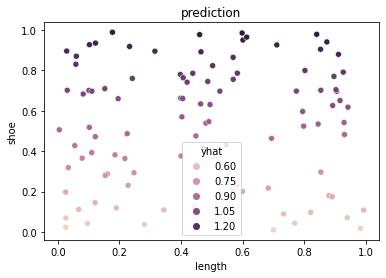

In [95]:
data = np.concatenate([X, yhat], axis=1)
p = pd.DataFrame(data, columns=['length', 'shoe', 'bias', 'yhat'])
sns.scatterplot(data=p, x='length', y='shoe', hue='yhat')
plt.title('prediction')

## Excercise 4
Create a class `linear_function` with three functions: `__init__`, `generate` and `predict`:

*\_\_init__*
- on initialization you pass variables $m$ and $n$, corresponding to $m$ observations with $n$ features.
- store the original $(m,n)$ dimensions as a tuple in the object
- you call the `generate` function

*generate*
- initialize random data using variables $n$ and $m$, add a column for the bias, 
- generate weights
- store data and weights in the object

*predict*
- you return the result of $f(x)=wx+b$


In [96]:
class linear_function():
    def __init__(self, m : int, n: int):
        self.shape = (m, n)
        self.generate()

    def generate(self):
        X = np.random.rand(self.shape[0],self.shape[1])
        Xb = np.ones((len(X), 1))
        self.X = np.concatenate([X, Xb], axis=1)
        self.W = np.random.rand(self.X.shape[-1],1)
    
    def predict(self):
        return np.dot(self.X, self.W)

## Excercise 5
If you have implemented your formula efficiently, you should be able to scale it up.

In [97]:
small = linear_function(1000, 3)
yhat = small.predict()

The next function should run in seconds. On my laptop, I run it in 1.7 seconds.

In [98]:
big = linear_function(100000, 1000)
yhat = big.predict()
len(yhat)

100000

## Excercise 6
Define a variable `threshold=1`.
Create a list comprehension that runs through the yhat, and assigns a value -1 for every value smaller then the threshold, else 1.

In [99]:
threshold = 1

clf = [-1 if x < threshold else 1 for x in yhat]

In [89]:
len(clf)

100000